In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import random

In [83]:
df = pd.read_csv('cancer_dataset_wpbc.csv')
df.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [84]:
df[0:140]

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,9012000,R,2,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,...,195.00,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1.0
136,901288,N,54,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.1527,...,166.80,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055,4.0,0.0
137,9013838,N,7,11.08,18.83,73.30,361.6,0.12160,0.21540,0.1689,...,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030,2.0,0.0
138,90291,N,57,14.60,23.29,93.97,664.7,0.08682,0.06636,0.0839,...,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,3.0,0.0


In [85]:
df.shape[0]

198

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       198 non-null    int64  
 1   Outcome                  198 non-null    object 
 2   Time                     198 non-null    int64  
 3   Mean Radius              198 non-null    float64
 4   Mean Texture             198 non-null    float64
 5   Mean Perimeter           198 non-null    float64
 6   Mean Area                198 non-null    float64
 7   Mean Smoothness          198 non-null    float64
 8   Mean Compactness         198 non-null    float64
 9   Mean Concavity           198 non-null    float64
 10  Mean Concave Points      198 non-null    float64
 11  Mean Symmetry            198 non-null    float64
 12  Mean Fractal Dimension   198 non-null    float64
 13  SE Radius                198 non-null    float64
 14  SE Texture               1

In [87]:
# inserting 0 for null values in Lymph Node Status
df['Lymph Node Status'] = df['Lymph Node Status'].fillna(0)
df['Lymph Node Status'].isna().sum()

0

In [88]:
len(df['ID'].unique())

198

In [89]:
df.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [90]:
df[['Mean Texture', 'Tumor Size']].describe()

,Mean Texture,Tumor Size
count,198.00000,198.000000
mean,22.27601,2.847475
std,4.29829,1.937964
min,10.38000,0.400000
25%,19.41250,1.500000
50%,21.75000,2.500000
75%,24.65500,3.500000
max,39.28000,10.000000


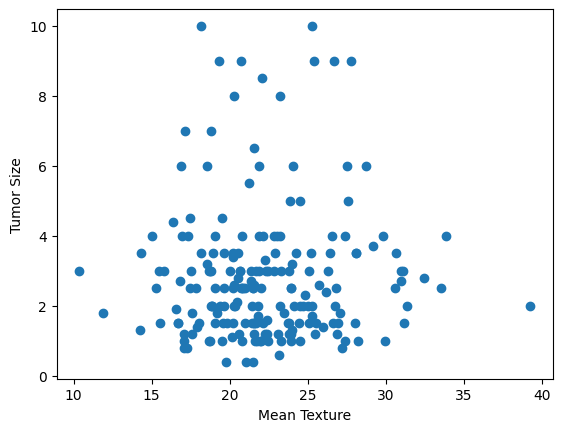

In [91]:
plt.scatter(x = df['Mean Texture'], y = df['Tumor Size'])
plt.xlabel('Mean Texture')
plt.ylabel('Tumor Size')
plt.show()


In [92]:
# correlation values lie between -1 to 1
df['Mean Texture'].corr(df['Tumor Size'])

0.027072884950328002

# Question 1

In [93]:
def prediction(theta_0, theta_1, x):                    #predicting values
    y_hat = theta_0 + (theta_1 * x)                     #y = mx + c
    return y_hat

In [94]:
def loss_func(y_hat, y):                                #cost function
    m = y.shape[0]
    err = y_hat - y                                        #y_hat is predicted value
    sqerr = np.sum((y_hat - y) ** 2) 
    loss = (1/(2*m)) * (sqerr)
    return err, loss, sqerr 

In [95]:
df[['Tumor Size', 'Mean Texture']].head()

,Tumor Size,Mean Texture
0,5.0,27.60
1,3.0,10.38
2,2.5,17.44
3,2.0,20.38
4,3.5,14.34


In [96]:
def GD(x, y, alpha, iterations):
    theta_0 = 0
    theta_1 = 0
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        err, loss, sqerr = loss_func(y_hat, y)
    
        m = x.shape[0]
    
        dtheta_0 = (1/m) * (np.sum(err))
        dtheta_1 = (1/m) * (np.sum(err * x))
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 5000 == 0 or i == (iterations - 1) :
            print(f'iteration: {i} ---> loss: {loss}')
    
    MSE = sqerr/m
    sst = np.sum((np.mean(y) - y) ** 2)
    R_sq = 1 - (sqerr/(sst))
    adjR_sq = 1 - (((1 - R_sq)*(m - 1))/(m - 2 - 1))
    print(f'MSE = {sqerr/m};\nR-squared = {R_sq};\nAdjusted R-squared = {adjR_sq}')
    
    return theta_0, theta_1

In [97]:
ratio = 0.7
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train_df = df[0:train_size]
test_df = df[train_size:]


In [98]:
# Training Data
x_train = train_df["Mean Texture"]
y_train = train_df["Tumor Size"]
y_train.shape

(138,)

In [100]:
# Testing Data
x_test = test_df["Mean Texture"]
y_test = test_df["Tumor Size"]
y_test.shape

(60,)

In [101]:
theta_0, theta_1 = GD(x_train, y_train, alpha = 0.003, iterations = 25000)

iteration: 0 ---> loss: 5.952753623188406
iteration: 5000 ---> loss: 1.880439357612422
iteration: 10000 ---> loss: 1.8618330291113057
iteration: 15000 ---> loss: 1.8552986055507101
iteration: 20000 ---> loss: 1.8530037577914273
iteration: 24999 ---> loss: 1.852197913245333
MSE = 3.704395826490666;
R-squared = 0.004444248949947438;
Adjusted R-squared = -0.010304725139683057


# Question 2.a

In [102]:
# initialize w -> (1, n); b -> (1, 1) where n is the number of features
def initialize(n):
    theta_0 = np.zeros((1, 1))
    theta_1 = np.zeros((1, n))
    return theta_0, theta_1


In [103]:
def prediction(theta_0, theta_1, x):
    y_hat = theta_0 + (np.dot(theta_1, x))
    return y_hat

In [104]:
def loss_func(y_hat, y):
    m = y.shape[1]
    err = y_hat - y
    sqerr = np.sum((err)**2) 
    loss = (1/(2*m)) * (sqerr)
    return err, loss, sqerr

In [105]:
def GD(x, y, alpha, iterations):
    n = x.shape[0]
    theta_0, theta_1 = initialize(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        err, loss, sqerr = loss_func(y_hat, y)
    
        m = x.shape[1]
    
        dtheta_0 = (1/m) * (np.sum(err))
        dtheta_1 = (1/m) * (np.dot(err, x.T))                               # performing dot product as we took more than one feature
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 10000 == 0 or i == (iterations - 1) :
            print(f'iteration: {i} ---> loss: {loss}')
    
    MSE = sqerr/m
    BIC = m * np.log(MSE) + n * np.log(m)
    sst = np.sum((np.mean(y) - y) ** 2)
    R_sq = 1 - (sqerr/(sst))
    adjR_sq = 1 - (((1 - R_sq)*(m - 1))/(m - 2 - 1))
    print(f'MSE = {sqerr/m};\nR-squared = {R_sq};\nAdjusted R-squared = {adjR_sq};\nBIC = {BIC}')
    #print(f'BIC = {BIC}')
    return (theta_0, theta_1), BIC

In [106]:
# predicting function
def predict(x, y, params):
    n = x.shape[0]
    m = x.shape[1]
    theta_0, theta_1 = params
    y_hat = prediction(theta_0, theta_1, x)
    err = y_hat - y
    sqerr = np.sum((err)**2) 
    MSE = sqerr/m
    sst = np.sum((np.mean(y) - y) ** 2)
    R_sq = 1 - (sqerr/(sst))
    adjR_sq = 1 - (((1 - R_sq)*(m - 1))/(m - 2 - 1))
    print(f'MSE = {sqerr/m};\nR-squared = {R_sq};\nAdjusted R-squared = {adjR_sq}')
    

In [107]:
#preprocessing the training dataset
x_train = train_df[['Mean Texture', 'Lymph Node Status']].T                                     
y_train = train_df['Tumor Size'].T                                                
y_train = y_train.to_numpy()
y_train = y_train.reshape(1, -1)

In [108]:
#preprocessing the testing dataset
x_test = test_df[['Mean Texture', 'Lymph Node Status']].T                                      
y_test = test_df['Tumor Size'].T
y_test = y_test.to_numpy()
y_test = y_test.reshape(1, -1)

In [110]:
# Training Step
# Fitting the Linear regression model for question 2.a
params, bic = GD(x_train, y_train, alpha = 0.003, iterations = 30000)

iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.2605742797618817
iteration: 20000 ---> loss: 1.2514145600112094
iteration: 29999 ---> loss: 1.2502847514265916
MSE = 2.500569502853183;
R-squared = 0.32797236956607134;
Adjusted R-squared = 0.31801640467075387;
BIC = 136.33406134634538


In [111]:
# Testing Step
predict(x_test, y_test, params)

MSE = 3.740670835678716;
R-squared = 0.00823268117693221;
Adjusted R-squared = -0.026566172115105147


# Question 3.a

In [29]:
def forward_stepwise(x, y, start, alpha, iterations):
    random.seed(15)
    colms = list(x.index)
    first = random.sample(colms, start)
    feature_to_add = None
    
    for i in range(0, 5):
        print(f'####################### Iteration {i + 1} #######################')
        if feature_to_add:
            first = first + feature_to_add
        
        print(first)
            
        remaining = [cols for cols in colms if cols not in first]
        x_base = x[x.index.isin(first)]
        print(f'####### Base model with {start + i} features #######')
        params, bic_base = GD(x_base, y, alpha, iterations)
        forward_bics = {}
    
        for feature in remaining:
            features_to_test = first.copy()
            features_to_test.append(feature)
            x_train = x[x.index.isin(features_to_test)]
            print(f'####### Model with {feature} added to Base model #######')
            params, bic = GD(x_train, y, alpha, iterations)
        
            if bic_base > bic:
                forward_bics[feature] = bic
    
        if forward_bics:
            min_bic = min(forward_bics.values())
            feature_to_add = [key for key in forward_bics if forward_bics[key] == min_bic]
            print(feature_to_add)
        else:
            print(f"No further features to add.\nModel with {start + i} features is the best model.")
            return first 
    
    return first + feature_to_add
    
    

In [30]:
# Data Preprocessing for Forward Stepwise
columns = ['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Symmetry', 
           'Mean Fractal Dimension', 'Worst Radius', 'Worst Area', 'Worst Symmetry', 'Lymph Node Status']
X_train = train_df[columns]
X_train = X_train.T

Y_train = train_df['Tumor Size'].T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)
Y_train.shape

(1, 138)

In [31]:
forward_features = forward_stepwise(X_train, Y_train, 5, 0.0000001, 30000)

####################### Iteration 1 #######################
['Mean Smoothness', 'Mean Radius', 'Worst Symmetry', 'Mean Perimeter', 'Worst Radius']
####### Base model with 5 features #######
iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.7797402316730102
iteration: 20000 ---> loss: 1.7797040435641767
iteration: 29999 ---> loss: 1.7796680389958115
MSE = 3.559336077991623;
R-squared = 0.04342903179398472;
Adjusted R-squared = 0.029257610042784377;
BIC = 199.8374849142941
####### Model with Mean Area added to Base model #######
iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.8488947430591658
iteration: 20000 ---> loss: 1.8080356604482515
iteration: 29999 ---> loss: 1.7901971140200603
MSE = 3.5803942280401206;
R-squared = 0.03776965753453432;
Adjusted R-squared = 0.023514393201712558;
BIC = 205.5787842310993
####### Model with Mean Symmetry added to Base model #######
iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.779

In [32]:
forward_features

['Mean Smoothness',
 'Mean Radius',
 'Worst Symmetry',
 'Mean Perimeter',
 'Worst Radius',
 'Lymph Node Status']

In [33]:
# Data preprocess

X_train = train_df[forward_features]
X_train = X_train.T
Y_train = train_df['Tumor Size'].T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)
Y_train.shape

(1, 138)

In [34]:
# Preprocess data for test set

X_test = test_df[forward_features]
X_test = X_test.T
Y_test = test_df['Tumor Size'].T
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1, -1)
Y_test.shape

(1, 60)

In [35]:
params, bic = GD(X_train, Y_train, alpha= 0.0001, iterations= 30000)

iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.2026041001029928
iteration: 20000 ---> loss: 1.2021947712891736
iteration: 29999 ---> loss: 1.2018238095143392
MSE = 2.4036476190286784;
R-squared = 0.35402010943071227;
Adjusted R-squared = 0.34445003697783394;
BIC = 150.5877867369343


In [36]:
predict(X_test, Y_test, params)

MSE = 3.8012436130208744;
R-squared = -0.007827032071640483;
Adjusted R-squared = -0.04318938407415418


## Question 3.b

In [37]:
def backward_stepwise(x, y, alpha, iterations):
    random.seed(15)
    
    first = list(x.index)
    feature_to_remove = None
    
    for i in range(0, 5):
        print(f'####################### Iteration {i + 1} #######################')
        if feature_to_remove:
            first.remove(feature_to_remove)
        
        print(first)
        
        x_base = x[x.index.isin(first)]
        print(f'####### Base model with {len(first)} features #######')
        params, bic_base = GD(x_base, y, alpha, iterations)
        backward_bics = {}
    
        for feature in first:
            features_to_test = first.copy()
            features_to_test.remove(feature)
            x_train = x[x.index.isin(features_to_test)]
            print(f'####### Model with {feature} removed from the Base model #######')
            params, bic = GD(x_train, y, alpha, iterations)
        
            if bic_base > bic:
                backward_bics[feature] = bic
    
        if backward_bics:
            min_bic = min(backward_bics.values())
            feature_to_remove = [key for key in backward_bics if backward_bics[key] == min_bic]
            print(feature_to_remove)
            feature_to_remove = feature_to_remove[0]
        else:
            print(f"No further features to remove.\nModel with {len(first)} features is the best model.")
            return first 
    
    first.remove(feature_to_remove)
    print(first)
    return first
    
    

In [38]:
columns = ['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Symmetry', 
           'Mean Fractal Dimension', 'Worst Radius', 'Worst Area', 'Worst Symmetry', 'Lymph Node Status']
X_train = train_df[columns]
X_train = X_train.T

Y_train = train_df['Tumor Size'].T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)
Y_train.shape

(1, 138)

In [39]:
backward_features = backward_stepwise(X_train, Y_train, 0.0000001, 30000)

####################### Iteration 1 #######################
['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Symmetry', 'Mean Fractal Dimension', 'Worst Radius', 'Worst Area', 'Worst Symmetry', 'Lymph Node Status']
####### Base model with 10 features #######
iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.8088773447783906
iteration: 20000 ---> loss: 1.7405819497969972
iteration: 29999 ---> loss: 1.6960223552155087
MSE = 3.392044710431017;
R-squared = 0.08838855849601301;
Adjusted R-squared = 0.07488320380706504;
BIC = 217.83027691136485
####### Model with Mean Radius removed from the Base model #######
iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.810188186122826
iteration: 20000 ---> loss: 1.7417088094785838
iteration: 29999 ---> loss: 1.6967536165700416
MSE = 3.3935072331400833;
R-squared = 0.08799550576562187;
Adjusted R-squared = 0.07448432807326077;
BIC = 212.96251083713597
####### Model with Mean Perimeter r

In [40]:
backward_features

['Mean Radius',
 'Mean Perimeter',
 'Worst Radius',
 'Worst Area',
 'Lymph Node Status']

In [41]:
# Data preprocess for train data
X_train = train_df[backward_features]
X_train = X_train.T

Y_train = train_df['Tumor Size'].T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)
Y_train.shape

(1, 138)

In [42]:
# Data preprocess for test data
X_test = test_df[backward_features]
X_test = X_test.T

Y_test = test_df['Tumor Size'].T
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1, -1)
Y_test.shape

(1, 60)

In [43]:
params, bic = GD(X_train, Y_train, alpha= 0.0000001, iterations=30000)

iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.8027027262759403
iteration: 20000 ---> loss: 1.7205600502207037
iteration: 29999 ---> loss: 1.6829669243746386
MSE = 3.365933848749277;
R-squared = 0.09540584815124797;
Adjusted R-squared = 0.08200445330904427;
BIC = 192.1276195318415


In [44]:
predict(X_test, Y_test, params)

MSE = 3.816134480134141;
R-squared = -0.01177506064742806;
Adjusted R-squared = -0.04727593996839041


## Question 4.a

In [122]:
df_new = df.copy(deep = True)
df_new.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [123]:
def loss_func(y_hat, y, lamda, theta_1):
    m = y.shape[1]
    err = y_hat - y
    sqerr = np.sum((err)**2) 
    loss = ((1/(2*m)) * (sqerr)) + ((lamda/(2*m)) * (np.sum(theta_1 ** 2)))
    return err, loss, sqerr

In [124]:
def GD(x, y, alpha, iterations, lamda):
    n = x.shape[0]
    theta_0, theta_1 = initialize(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        err, loss, sqerr = loss_func(y_hat, y, lamda, theta_1)
    
        m = x.shape[1]
    
        dtheta_0 = (1/m) * (np.sum(err))
        dtheta_1 = (1/m) * (np.dot(err, x.T))
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = ((theta_1)*(1 - (alpha * (lamda/m)))) - (alpha * dtheta_1)
        
        if i % 10000 == 0 or i == (iterations - 1) :
            print(f'iteration: {i} ---> loss: {loss}')
    
    MSE = sqerr/m
    BIC = m * np.log(MSE) + n * np.log(m)
    sst = np.sum((np.mean(y) - y) ** 2)
    R_sq = 1 - (sqerr/(sst))
    adjR_sq = 1 - (((1 - R_sq)*(m - 1))/(m - 2 - 1))
    print(f'MSE = {sqerr/m};\nR-squared = {R_sq};\nAdjusted R-squared = {adjR_sq};\nBIC = {BIC}')
    #print(f'BIC = {BIC}')
    return (theta_0, theta_1), BIC

In [125]:
ratio = 0.7
 
total_rows = df_new.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train_df = df_new[0:train_size]
test_df = df_new[train_size:]


In [126]:
# Training Data
x_train = train_df[['Mean Texture', 'Lymph Node Status']]
y_train = train_df["Tumor Size"]
y_train.shape

(138,)

In [127]:
# Testing Data
x_test = test_df[['Mean Texture', 'Lymph Node Status']]
y_test = test_df["Tumor Size"]
y_test.shape

(60,)

In [128]:
X_train = x_train.T
Y_train = y_train.T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)

In [130]:
X_test = x_test.T
Y_test = y_test.T
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1, -1)

In [136]:
params, bic = GD(X_train, Y_train, alpha= 0.003, iterations=30000, lamda= 10)

iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.262111466019594
iteration: 20000 ---> loss: 1.2529830048756774
iteration: 29999 ---> loss: 1.2518669132779798
MSE = 2.5005698331614674;
R-squared = 0.3279722807957759;
Adjusted R-squared = 0.31801631458534285;
BIC = 136.3340795752089


In [132]:
predict(X_test, Y_test, params)

MSE = 3.736961307288931;
R-squared = 0.009216191671933549;
Adjusted R-squared = -0.025548152479928365


## Question 4.b

In [137]:
def normalize(column):
    column = (column - column.mean())/column.std()
    return column

In [138]:
df_new[['Mean Texture', 'Lymph Node Status']] = df_new[['Mean Texture', 'Lymph Node Status']].agg(normalize)

In [140]:
# Splitting Training and testing set for Normalized data for model with 2 variables
x_train_normalized = df_new[0:138]
y_train = df_new[0:138]

x_test_normalized = df_new[138:]
y_test = df_new[138:]

In [141]:
X_train = x_train_normalized[['Mean Texture', 'Lymph Node Status']].T
Y_train = y_train['Tumor Size'].T
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(1, -1)

In [142]:
X_test = x_test_normalized[['Mean Texture', 'Lymph Node Status']].T
Y_test = y_test['Tumor Size'].T
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(1, -1)

In [143]:
def loss_func(y_hat, y):
    m = y.shape[1]
    err = y_hat - y
    sqerr = np.sum((err)**2) 
    loss = (1/(2*m)) * (sqerr)
    return err, loss, sqerr

In [144]:
def GD(x, y, alpha, iterations):
    n = x.shape[0]
    theta_0, theta_1 = initialize(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        err, loss, sqerr = loss_func(y_hat, y)
    
        m = x.shape[1]
    
        dtheta_0 = (1/m) * (np.sum(err))
        dtheta_1 = (1/m) * (np.dot(err, x.T))                               # performing dot product as we took more than one feature
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 10000 == 0 or i == (iterations - 1) :
            print(f'iteration: {i} ---> loss: {loss}')
    
    MSE = sqerr/m
    BIC = m * np.log(MSE) + n * np.log(m)
    sst = np.sum((np.mean(y) - y) ** 2)
    R_sq = 1 - (sqerr/(sst))
    adjR_sq = 1 - (((1 - R_sq)*(m - 1))/(m - 2 - 1))
    print(f'MSE = {sqerr/m};\nR-squared = {R_sq};\nAdjusted R-squared = {adjR_sq};\nBIC = {BIC}')
    #print(f'BIC = {BIC}')
    return (theta_0, theta_1), BIC

In [145]:
params, bic = GD(X_train, Y_train, alpha= 0.003, iterations=30000)

iteration: 0 ---> loss: 5.952753623188406
iteration: 10000 ---> loss: 1.2501257440526166
iteration: 20000 ---> loss: 1.2501257440526166
iteration: 29999 ---> loss: 1.2501257440526166
MSE = 2.500251488105233;
R-squared = 0.3280578359757288;
Adjusted R-squared = 0.3181031372494433;
BIC = 136.3165098141647


In [146]:
predict(X_test,Y_test,params)

MSE = 3.7401790175064438;
R-squared = 0.008363077357588122;
Adjusted R-squared = -0.026431200629864815
